# Read TEM Image

*Author: Gerd Duscher*

*Date: January 2021*

A fast introduction into how to read an NSID formatted HDF5 files to SIDpy datasets.

Start with standard imports:

In [1]:
# Ensure python 3 compatibility:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import sys
import warnings

import h5py
import matplotlib.pylab as plt
import numpy as np

# we will also need a sidpy package
try:
    import sidpy 
except ModuleNotFoundError:
    !pip3 install sidpy
    import sidpy as sid

sys.path.append('../')
import pyNSID 

warnings.filterwarnings("ignore", module="numpy.core.fromnumeric")
warnings.filterwarnings("ignore", module="pyNSID.io.nsi_reader")

# Download test h5 file
!wget -qq -O 'STO_test_image.hf5' 'https://github.com/ziatdinovmax/pyNSID/blob/master/notebooks/00_basic_usage/STO_test_image.hf5?raw=true'

'wget' is not recognized as an internal or external command,
operable program or batch file.


## Reading pyNSID file into sidpy.Dataset object(s)

Let's read a test image into a sidpy Dataset

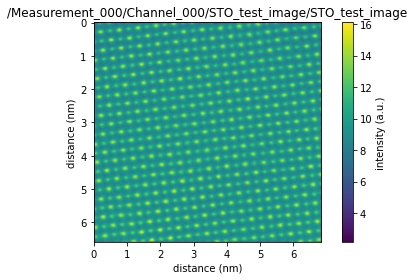

In [3]:
reader = pyNSID.NSIDReader('./STO_test_image.hf5')
sid_dataset = reader.read()[0]
assert isinstance(sid_dataset, sidpy.Dataset)
sid_dataset.plot()

The dataset we read is an enhanced dask dataset.

In [4]:
print(sid_dataset)
sid_dataset

sidpy.Dataset of type IMAGE with:
 dask.array<generic, shape=(470, 453), dtype=float64, chunksize=(470, 453), chunktype=numpy.ndarray>
 data contains: intensity (a.u.)
 and Dimensions: 
y:  distance (nm) of size (470,)
x:  distance (nm) of size (453,)


sidpy.Dataset of type IMAGE with:
 dask.array<generic, shape=(470, 453), dtype=float64, chunksize=(470, 453), chunktype=numpy.ndarray>
 data contains: intensity (a.u.)
 and Dimensions: 
y:  distance (nm) of size (470,)
x:  distance (nm) of size (453,)

## HDF5 File Structure

To see where the dataset is exactly stored in the hdf5 file we can fiew the file tree of this hierarchical data structure. For convenience the reference to the h5py.Dataset is stored in an attribute `h5_dataset` in the sidpy.Dataset.

Each sidpy dataset is stored in a `h5py.Group` with it's name which contains a `h5py.Dataset` with the same name (here STO_test_image). We also have the `x` and `y` dimensions stored in that group.


In [5]:
h5_file = sid_dataset.h5_dataset.file
sidpy.hdf_utils.print_tree(h5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ STO_test_image
      --------------
      ├ STO_test_image
      ├ __dict__
        --------
      ├ _axes
        -----
      ├ x
      ├ y


## Close the hdf5 file

In [6]:
sid_dataset.h5_dataset.file.close()

## HDF5 File Access

The file can also be opened as a pure hdf5 file

In [8]:
h5_file2 = h5py.File('./STO_test_image.hf5', mode='r')

h5_group = h5_file2['Measurement_000/Channel_000']
print(h5_group.keys())


<KeysViewHDF5 ['STO_test_image']>


In [9]:
for key in h5_group:
    print(h5_group[key].keys())

<KeysViewHDF5 ['STO_test_image', '__dict__', '_axes', 'x', 'y']>


## Close the hdf5 file

In [11]:
h5_file.close()